In [1]:
!pip3 install sklearn

In [1]:
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Case 1: Balanced Dataset

In [2]:
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, random_state=42, weights=[0.5])
Xs = pd.DataFrame(X, columns = ['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 
                                'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10'])
ys = pd.DataFrame(y, columns=['label'])

In [3]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(Xs, ys, test_size=0.10, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.10, shuffle=False)

In [4]:
y_train['label'].value_counts()

1    4058
0    4042
Name: label, dtype: int64

### 1.1 Uncalibrated Model

In [14]:
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict_proba(X_test)[:, 1]

In [6]:
roc_auc_score(y_test, y_pred)

0.942381925749327

In [7]:
brier_score_loss(y_test, y_pred)

0.09227701459205993

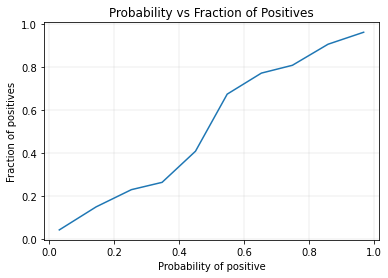

In [8]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)

### 1.2 Calibrated Model (prefit)

In [15]:
calibrated_clf = CalibratedClassifierCV(clf, cv='prefit', method='isotonic')
calibrated_clf.fit(X_val, y_val)
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

In [16]:
roc_auc_score(y_test, y_pred)

0.9375157505670204

In [17]:
brier_score_loss(y_test, y_pred)

0.09289976063789582

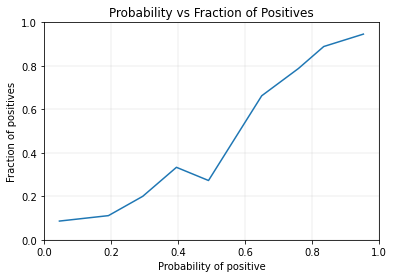

In [18]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)

### 1.3 Calibrated Model (together)

In [9]:
clf = LogisticRegression(class_weight='balanced')
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=3, method='isotonic')
calibrated_clf.fit(X_train, y_train.values.ravel())
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

In [10]:
roc_auc_score(y_test, y_pred)

0.9427779400058403

In [11]:
brier_score_loss(y_test, y_pred)

0.09065519848638479

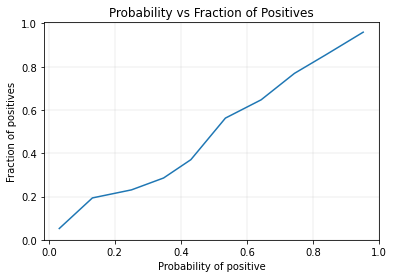

In [12]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)

## Case 2: Unbalanced Dataset

In [61]:
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, random_state=42, weights=[0.9])
Xs = pd.DataFrame(X, columns = ['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 
                                'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10'])
ys = pd.DataFrame(y, columns=['label'])

In [62]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(Xs, ys, test_size=0.10, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.10, shuffle=False)

In [63]:
y_train['label'].value_counts()

0    7268
1     832
Name: label, dtype: int64

### 2.1 Uncalibrated Model

In [64]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict_proba(X_test)[:, 1]

In [65]:
roc_auc_score(y_test, y_pred)

0.9076559154250609

In [66]:
brier_score_loss(y_test, y_pred)

0.08754942108418134

In [67]:
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])
pred_df = pd.concat([y_pred_df, y_test.reset_index()],axis=1)[['prediction', 'label']]

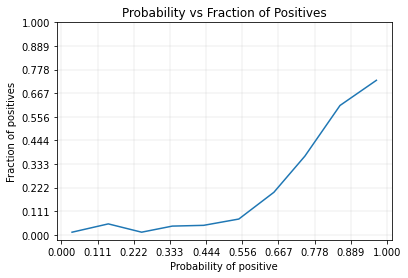

In [46]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
ticks = np.linspace(0, 1, 10)
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)

### 2.2 Calibrated Model (prefit)

In [47]:
calibrated_clf = CalibratedClassifierCV(clf, cv='prefit', method='isotonic')
calibrated_clf.fit(X_val, y_val)
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

In [48]:
roc_auc_score(y_test, y_pred)

0.9027231246987074

In [49]:
brier_score_loss(y_test, y_pred)

0.050158307395964885

In [50]:
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])
pred_df = pd.concat([y_pred_df, y_test.reset_index()],axis=1)[['prediction', 'label']]

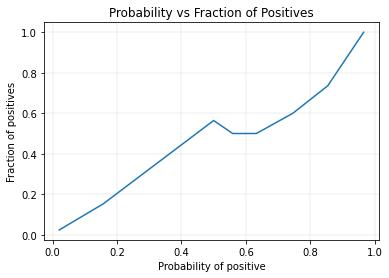

In [51]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")

### 2.3 Calibrated Model (together)

In [53]:
clf = LogisticRegression(class_weight='balanced')
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=3, method='isotonic')
calibrated_clf.fit(X_train, y_train.values.ravel())
y_pred = calibrated_clf.predict_proba(X_test)[:, 1]

In [54]:
roc_auc_score(y_test, y_pred)

0.9082949360418839

In [55]:
brier_score_loss(y_test, y_pred)

0.048619216544637696

In [56]:
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])
pred_df = pd.concat([y_pred_df, y_test.reset_index()],axis=1)[['prediction', 'label']]

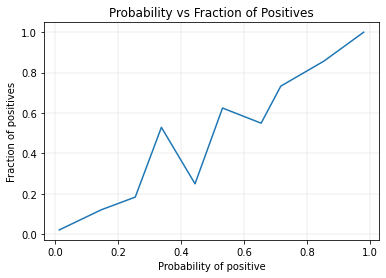

In [57]:
plt.rcParams.update({'font.size': 10})
frac_of_positives, pred_prob = calibration_curve(y_test, y_pred, n_bins=10)
sns.lineplot(x=pred_prob, y=frac_of_positives)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Probability vs Fraction of Positives")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")

### Application

$$ E[X] = x P(x) $$

If each of these 10K samples is a credit card transaction. And we want to know how we could save with this model in place, this formula is useful.

So if there is a fraudulent transaction for \$100. Plopping this into the calibrated model gives 0.7. Since the model is calibrated, it can be interpretted as a probability.

$$ E(X) = 100 * 0.7 = \$70 $$

If the model predicted this correctly, we would have effectively saved \$70 with this transaction

## Notes

https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/isotonic.py#L269

The regression is between the predictions of the classifier and the weights of each sample (created with a frequency distribution). Those preds within an epsilon of each other increase the weight